<h3>Convolutional Operation and its complexity</h3>

In this notebook we shall look at how to use numpy to build a simple convolve function with no padding and a stride of 1. We shall also look at the computational complexity of convolution.

Given an image of input shape (n, n) the shape of the output convolved image is given by:
                                
                                ([(n+2p-f)/s]+1, ...)
                                
Note that for the sake of simplicity p= 0 and s= 1, here.       

Note: The term convolution is used out of convinence. The textbook term is cross-correlation.

In [125]:
import numpy as np
from numpy.lib.stride_tricks import as_strided as strided

In [126]:
### Strided
def convolve(x, fltr):
    # Ip and Op shapes
    ipshp0, ipshp1= x.shape
    opshp0, opshp1= x.shape[0]-fltr.shape[0]+1, x.shape[1]-fltr.shape[1]+1

    # Shape of the split of input array in 3D
    s1, s23= x.shape[0]*x.shape[1]-(fltr.shape[0]-1)*x.shape[0]-fltr.shape[0]+1, fltr.shape[0]

    # Stride lengths based on memory
    xStr1, xStr2= x.strides[1], x.strides[1]*x.shape[0]

    # Extracting smaller arrays out of the bigger one to convolve over
    x_str= strided(x, shape= (s1, s23, s23), strides= (xStr1, xStr2, xStr1))

    # Indices for strides
    l= np.arange(0, x.shape[0]-fltr.shape[0]+1)
    ind= (np.repeat(l.reshape(1, l.shape[0]), opshp0, axis= 0)+np.array(l*ipshp0).reshape(opshp0, 1)).ravel()

    # Extracting the exact matrices
    x_str= x_str[ind]

    # Convolution
    conv= x_str*fltr
    convolved= conv.sum(1).sum(1).reshape(opshp0, opshp1)

    return convolved

In [134]:
# Testing on three filters of size (3, 3), (5, 5), (7, 7)
fltr3= np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
fltr5= np.array([[1, 0, -1, 0, 1], [1, 0, -1, 0, 1], [1, 0, -1, 0, 1], [1, 0, -1, 0, 1], [1, 0, -1, 0, 1]])
fltr7= np.array([[1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1], [1, 0, -1, 0, 1, 0, -1]])

# Finding convolution complexity

In [133]:
j= []
for i in range(10, 1000, 10):
    x= np.random.randint(size= (i, i), high= 10, low= 1)
    temp= %timeit -o convolve(x, fltr3)
    j.append(temp.average)

47.4 µs ± 1e+03 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
114 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
204 µs ± 9.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
337 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
514 µs ± 5.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
744 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.03 ms ± 45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.37 ms ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.69 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.03 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.45 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.49 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.75 ms ± 97.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.22 ms ± 94.2 µs per loop (mean ± std. dev. of 7 runs, 100 lo

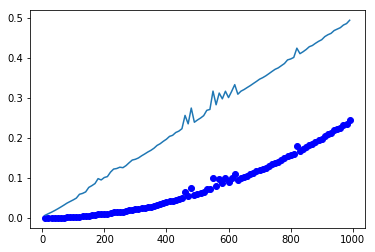

In [166]:
import matplotlib.pyplot as plt

y= np.arange(10, 1000, 10)

plt.plot(y.tolist(), j, 'bo')
plt.plot(y.tolist(), np.sqrt(j))

Therefore, convolutional operation is O(n^2).